In [1]:
#load the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os 
import requests 
import string 
import tweepy
from tweepy import OAuthHandler


%matplotlib inline

## Gather Data

### load the provided enhanced twitter archive file into a DataFrame

In [2]:
archived = pd.read_csv('twitter-archive-enhanced.csv')
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
#See a deleted tweet
sample_tweet = archived.iloc[2]
sample_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [4]:
sample_tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

## Load the image predictions file

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
print("Done!")
print(response)

Done!
<Response [200]>


In [6]:
#Read TSV file
predictions = pd.read_csv('image-predictions.tsv', sep='\t' )
predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
predictions.iloc[5]

tweet_id                                 666050758794694657
jpg_url     https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
img_num                                                   1
p1                                     Bernese_mountain_dog
p1_conf                                            0.651137
p1_dog                                                 True
p2                                         English_springer
p2_conf                                            0.263788
p2_dog                                                 True
p3                               Greater_Swiss_Mountain_dog
p3_conf                                           0.0161992
p3_dog                                                 True
Name: 5, dtype: object

## Connect to twitter api

In [8]:
consumer_key = 'vXwfiWytVFGCRCAoyNhQNWVRZ'
consumer_secret = 'ler1DcCnkitwnbT6VVVRwYAzHHa0P0ac9ylMwO2lgIpeaWhghO'
access_token = '1258069471874383876-zr9a10JaNfJlX2XgE2ZPG8ExfGoTXw'
access_secret = '3Rv0uazTEk3DOdSKxJS9Uju472w2ZV9uyZEJbL8swWp4t'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet = api.get_status(archived.tweet_id[2000], tweet_mode='extended')
info = tweet._json
info

{'created_at': 'Thu Dec 03 18:52:12 +0000 2015',
 'id': 672488522314567680,
 'id_str': '672488522314567680',
 'full_text': 'This is Jackie. She was all ready to go out, but her friends just cancelled on her. 10/10 hang in there Jackie https://t.co/rVfi6CCidK',
 'truncated': False,
 'display_text_range': [0, 134],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 672488519928037376,
    'id_str': '672488519928037376',
    'indices': [111, 134],
    'media_url': 'http://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'url': 'https://t.co/rVfi6CCidK',
    'display_url': 'pic.twitter.com/rVfi6CCidK',
    'expanded_url': 'https://twitter.com/dog_rates/status/672488522314567680/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 304, 'h': 411, 'resize': 'fit'},
     'small': {'w': 304, 'h': 411, 'resize': 'f

## Download tweets

In [9]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = archived.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259247104
TweepError for id:  770743923962707968
TweepError for id:  759566828574

### Save JSON data to file

In [376]:
tweet_json_file = 'tweet_json.txt'

In [377]:
# save the JSON data in the list to the output file
with open(tweet_json_file, 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

### Read in JSON data to DataFrame

In [378]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7725,36297
1,892177421306343426,5718,31301
2,891815181378084864,3786,23568
3,891689557279858688,7888,39594
4,891327558926688256,8506,37812
5,891087950875897856,2851,19046
6,890971913173991426,1855,11093
7,890729181411237888,17242,61162
8,890609185150312448,3924,26200
9,890240255349198849,6718,29949


In [379]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


### Save tweet data as a csv file

In [380]:
df_tweet_data.to_csv('tweet_data.csv', index = False)

## Assessing Data

In [381]:
#Load all the files
archived = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
t_data = pd.read_csv('tweet_data.csv')

### We start by archived file 

In [382]:
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### There are a lot of issues with this dataset:
#### Quality:

* There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
* There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
* There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
* The timestamp field is in string format (object)
* There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
* The columns related to retweets are not applicable for original tweets
* The columns related to replies are not applicable for original tweets
* There are 775 tweets with the dog name as "None".
* Most appropriate data type for the rating_numerator column should be float and also it should be correctly extracted.
* Retweet_count and favorite_count should be integers, not floats
* In the source column, we have to simplify the html tags
* in the Json file,  Several tweets have been deleted since the archive was created.
* These words are all the 3rd word in the tweet.
* Values of "None" in the name column.

#### Tidiness:
* There are 4 columns for dog stages (doggo, floofer, pupper, puppo). This will be fix by store all of them in a single column.
* The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left. This is gonna make difficult the readability of the data.
* Reply tweets are not “original tweets”. This data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

In [383]:
print("Duplicated:  {}".format(sum(archived.duplicated())))

Duplicated:  0


In [384]:
archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [385]:
archived.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [386]:
archived['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

With head() and tail() methods we realize that there are a lot of issues in the data

Quality:

* The timestamp column has dates in string form.
* Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a", "an", "in". * These words are all the 3rd word in the tweet.
* Values of "None" in the name column.

Tidiness:

* The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left. This is gonna make difficult the readability of the data.


Checking name column. 
<br> There are 745 None values.
<br> We can also see some values like a, very and an which can not be dog names.
<br> This words are not capitalized so we can see that is not a dog name.

In [387]:
archived.name.value_counts().head(50)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Bailey       7
Toby         7
an           7
Buddy        7
Oscar        6
Jack         6
Scout        6
Jax          6
Rusty        6
Koda         6
Dave         6
Bella        6
Stanley      6
Leo          6
Milo         6
Gus          5
Larry        5
Oakley       5
Finn         5
Sunny        5
Chester      5
George       5
Sammy        5
Phil         5
Louis        5
Alfie        5
very         5
Bentley      5
one          4
Moose        4
Cassie       4
Walter       4
just         4
Maddie       4
Loki         4
Gerald       4
Name: name, dtype: int64

In [388]:
# list all names that are NOT capitalized
no_cap_names = archived.name.str.contains('^[a-z]', regex = True)
archived[no_cap_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [389]:
len(archived[no_cap_names])

109

expanded_urls column

In [390]:
#We gonna check for the missing values first
archived['expanded_urls'].isna().sum()

59

In [391]:
# check for tweets that are missing urls that are not retweets or replies
missing = archived.expanded_urls.isna() & \
       archived.in_reply_to_status_id.isna() & \
       archived.retweeted_status_id.isna()
archived[missing][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [392]:
archived[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


Many of the larger numbers are multiples of 10. When looking at some of those tweets we see that there is more than 1 dog in the photo.

In [393]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
find = (archived.rating_denominator != 10) & \
            archived.in_reply_to_status_id.isna() & \
            archived.retweeted_status_id.isna()

find2 = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archived[find][find2]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [394]:
#We can check some of those tweets if we want.
# line 902 is a video with a lot of dogs
archived.iloc[902].expanded_urls

'https://twitter.com/dog_rates/status/758467244762497024/video/1'

In [395]:
archived.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [396]:
#Check the sum of tweets with numerator >= 15
sum(archived.rating_numerator >= 15)

28

In [397]:
archived.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### We will check now the entries with doggo, floofer, pupper, and puppo

In [398]:
archived.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [399]:
archived.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [400]:
archived.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [401]:
archived.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Let's see now the texts with these words

In [402]:
archived[archived.puppo == 'puppo'].text

12      Here's a puppo that seems to be on the fence a...
14      This is Stuart. He's sporting his favorite fan...
71      This is Snoopy. He's a proud #PrideMonthPuppo....
94      This is Sebastian. He can't see all the colors...
129     This is Shikha. She just watched you drop a sk...
168     Sorry for the lack of posts today. I came home...
191     Here's a puppo participating in the #ScienceMa...
395     Here's a very loving and accepting puppo. Appe...
397     RT @dog_rates: Say hello to Pablo. He's one go...
398     Say hello to Pablo. He's one gorgeous puppo. A...
413     Here's a super supportive puppo participating ...
438     RT @dog_rates: This is Oliver. He has dreams o...
439     This is Oliver. He has dreams of being a servi...
469     RT @dog_rates: This is Betty. She's assisting ...
546     RT @dog_rates: This is Reginald. He's one magi...
554     This is Diogi. He fell in the pool as soon as ...
567     This is Loki. He'll do your taxes for you. Can...
615     RT @do

In [403]:
archived[archived.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

In [404]:
archived[archived.pupper == 'pupper'].text

29      This is Roscoe. Another pupper fallen victim t...
49      This is Gus. He's quite the cheeky pupper. Alr...
56      Here is a pupper approaching maximum borkdrive...
78      RT @rachel2195: @dog_rates the boyfriend and h...
82      This is Ginger. She's having a ruff Monday. To...
                              ...                        
1995    Meet Scott. Just trying to catch his train to ...
2002    Say hello to Jazz. She should be on the cover ...
2009    This is Rolf. He's having the time of his life...
2015    This is Opal. He's a Royal John Coctostan. Rea...
2017    This is Bubba. He's a Titted Peebles Aorta. Ev...
Name: text, Length: 257, dtype: object

In [405]:
archived[archived.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

### Now let's check image predictions file.

In [406]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [407]:
predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [408]:
predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [409]:
predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [410]:
predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [411]:
#There are some predictions that do not refer to dog breeds. Let's check them
predictions[~predictions.p1_dog & \
               ~predictions.p2_dog & \
               ~predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


## Json file data.

In [412]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [413]:
df_tweet_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7725,36297
1,892177421306343426,5718,31301
2,891815181378084864,3786,23568
3,891689557279858688,7888,39594
4,891327558926688256,8506,37812
5,891087950875897856,2851,19046
6,890971913173991426,1855,11093
7,890729181411237888,17242,61162
8,890609185150312448,3924,26200
9,890240255349198849,6718,29949


In [414]:
df_tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2711.650365,7580.250536
std,6.823170e+16,4586.049228,11764.662741
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,548.500000,1322.500000
50%,7.182469e+17,1272.000000,3297.000000
75%,7.986692e+17,3150.500000,9286.000000
max,8.924206e+17,78066.000000,156660.000000


## Clean data

In [415]:
#We will create copies of the original dataframes.
archived2 = archived.copy()
predictions2 = predictions.copy()
t_data2 = t_data.copy()

In [416]:
archived2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Quality
there are 181 retweets and we need to drop those. We only care about original tweets

In [417]:
print("Total number of retweets: {}".format(sum(archived2.retweeted_status_id.notnull())))

Total number of retweets: 181


In [418]:
archived2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [419]:
len_ar = archived2.shape[0];
len_ar

2356

We will also drop the replies. We only need original tweets.

In [420]:
print("# of replies:  {}".format(sum(archived2.in_reply_to_status_id.notnull())))

# of replies:  78


In [421]:
# If a is not NaN in these columns, it means it's a reply or a retweet, so drop the row
archived2 = archived2.drop(archived2[(archived2.in_reply_to_status_id.notnull()) | (archived2.retweeted_status_id.notnull())].index)

# Removing those columns
archived2 = archived2.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                  'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [422]:
#Confirm the drop of the columns
archived2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


Since the data analysis part is based on the ratings we should properly clean these values otherwise we risk altering the results of the data analysis, weakening our findings. 

In [423]:
rating = archived2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

The rating_denominator column is acceptable as an integer but is preferred as float since there is nothing stopping future dog ratings from having a number with a decimal in the denominator.

In [424]:
archived2['rating_denominator'] = archived2['rating_denominator'].astype(float)

In [425]:
#We inspect the changes
archived2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   float64
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 213.0+ KB


Considering that the data analysis part is based on the rating columns we should mention among the data quality issues that the most appropriate data type for the rating_numerator column should be float and also it should be correctly extracted. Indeed there are some anomalous values in the twitter_archive_enhanced.csv, as written in the project pages is explained that the ratings are extracted incorrectly. There are many more such issues in the dataset. So it should be extracted and cleaned correctly. The rating_denominator column is acceptable as an integer but is preferred as float since there is nothing stopping future dog ratings from having a number with a decimal in the denominator.

Retweets and Favorite Count: retweet_count and favorite_count should be integers, not floats.

### Timestamp is an object. We will convert it to datetime.

In [426]:
archived2['timestamp'] = pd.to_datetime(archived2.timestamp)
archived2['timestamp'] = archived2.timestamp.dt.floor('s')

In [427]:
#Confirm the change
archived2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

We need to clean the html tags from source column in order to be better read.

In [428]:
archived2.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [429]:
archived2['source'] = archived2['source'].str.extract('^<a.+>(.+)</a>$')

In [430]:
#Confirm the change
t = archived2['source'] 
t.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Another issue is that some tweets have wrong rating value.

In [431]:
archived2.head(30)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10.0,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10.0,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10.0,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10.0,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10.0,Cassie,doggo,None,None,None


In [432]:
archived2['tweet_id'].duplicated().sum()

0

### Quality issue
We now have to change rating numerator and rating_denominator from problematic tweets

In [433]:
#id 740373189193256964

clean_t = archived2.tweet_id == 740373189193256964
archived2.loc[clean_t, 'rating_numerator'] = 14
archived2.loc[clean_t, 'rating_denominator'] = 10

#id 716439118184652801

clean_t = archived2.tweet_id == 716439118184652801
archived2.loc[clean_t, 'rating_numerator'] = 11
archived2.loc[clean_t, 'rating_denominator'] = 10

#id 682962037429899265
clean_t = archived2.tweet_id == 682962037429899265
archived2.loc[clean_t, 'rating_numerator'] = 10
archived2.loc[clean_t, 'rating_denominator'] = 10

#id 666287406224695296
clean_t = archived2.tweet_id == 666287406224695296
archived2.loc[clean_t, 'rating_numerator'] = 9
archived2.loc[clean_t, 'rating_denominator'] = 10

In [434]:
clean_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archived2[(archived2.tweet_id == 740373189193256964) | \
              (archived2.tweet_id == 716439118184652801) | \
              (archived2.tweet_id == 682962037429899265) | \
              (archived2.tweet_id == 666287406224695296) ][clean_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10.0
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10.0
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10.0
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9,10.0


### Quality issue
There are 5 tweets with rating_numerator >= 15

Those tweets don't make sense so we gonna drop them.

In [435]:
# display numerators greater than 15
numerators = archived2.rating_numerator >= 15
archived2[numerators].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
204     1
165     1
144     1
121     1
99      1
88      1
84      1
80      1
75      1
60      1
45      1
44      1
27      1
26      1
24      1
Name: rating_numerator, dtype: int64

In [436]:
archived2 = archived2[archived2.rating_numerator < 15]

In [437]:
archived2.rating_numerator.value_counts().sort_index(ascending = False)

14     39
13    287
12    486
11    414
10    437
9     153
8      98
7      51
6      32
5      34
4      16
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Expanded_urls problem. 
We will remove na rows from expanded_urls column

In [438]:
archived2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None,None,None,None


In [439]:
#We have 3 na rows
archived2.expanded_urls.isna().sum()

3

In [440]:
#We drop the na rows 
archived2 = archived2[archived2.expanded_urls.notnull()]

In [441]:
archived2['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2077, dtype: object

In [442]:
#We now have 2077 no null rows in all the dataset columns.
archived2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   float64            
 7   name                2077 non-null   object             
 8   doggo               2077 non-null   object             
 9   floofer             2077 non-null   object             
 10  pupper              2077 non-null   object             
 11  puppo               2077 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [443]:
archived2.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,None,None,None


We have a Tidiness issue here. We have a column named doggo, a column named floofer, a column named pupper and a column named puppo. We will combine those columns in one column named dog_type.

In [444]:
#We can check those columns.
archived2[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2077,2077,2077,2077
unique,2,2,2,2
top,None,None,None,None
freq,1994,2067,1849,2053


In [445]:
dog_type = []

x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in archived2['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_type.append(y[x.index(word)])
            break
    else:
        dog_type.append('None')

archived2['dog_type'] = dog_type

In [450]:
archived2['dog_type'].value_counts()

None      1687
pupper     246
doggo       79
floof       35
puppo       30
Name: dog_type, dtype: int64

Combine the doggo, floofer, pupper, puppo columns into one column dog_type and after drop the unnecessary columns. 

In [452]:
archived2.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [453]:
archived2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type'],
      dtype='object')

Most appropriate data type for the rating_numerator column should be float and also it should be correctly extracted.

In [542]:
archived2['rating_numerator'] = archived2['rating_numerator'].astype(float)

In [543]:
archived2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   float64            
 6   rating_denominator  2077 non-null   float64            
 7   name                2077 non-null   object             
 8   dog_type            2077 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 162.3+ KB


### Now we will merge the 3 datasets into 1
Merge all three dataframes using 'tweet_id' column to form a master dataframe 'data' which can be used for effective analysis

In [454]:
#We merge the 3 datasets
data_new = pd.merge(archived2, t_data2, how = 'inner', on = 'tweet_id')
data_new = pd.merge(data_new, predictions2, how = 'inner', on = 'tweet_id')

In [455]:
data_new.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,7725,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,5718,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,3786,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None,7888,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None,8506,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [457]:
data_new.dog_type.value_counts()

None      1594
pupper     225
doggo       67
floof       33
puppo       28
Name: dog_type, dtype: int64

We will drop one more unused column:
expanded_urls

In [460]:
data_new.drop(['expanded_urls'], 1, inplace=True)

In [461]:
data_new.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,None,7725,36297,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10.0,Tilly,None,5718,31301,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10.0,Archie,None,3786,23568,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [462]:
#Inspect the dataframe
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1947 non-null   int64              
 1   timestamp           1947 non-null   datetime64[ns, UTC]
 2   source              1947 non-null   object             
 3   text                1947 non-null   object             
 4   rating_numerator    1947 non-null   int64              
 5   rating_denominator  1947 non-null   float64            
 6   name                1947 non-null   object             
 7   dog_type            1947 non-null   object             
 8   retweet_count       1947 non-null   int64              
 9   favorite_count      1947 non-null   int64              
 10  jpg_url             1947 non-null   object             
 11  img_num             1947 non-null   int64              
 12  p1                  1947 non-null 

The merge caused some issues so we will have to do some more cleaning.
We will drop tweets with missing json_data.
and also change the data type for the retweet_count and favorite_count to be int.

In [463]:
cols = ['tweet_id', 'retweet_count', 'favorite_count']
data_new[data_new.retweet_count.isna() | data_new.favorite_count.isna()][cols]

,tweet_id,retweet_count,favorite_count


In [464]:
data_new = data_new[~(data_new.retweet_count.isna() | data_new.favorite_count.isna())]

# recast the count columns to int type
data_new.retweet_count = data_new.retweet_count.astype(int)
data_new.favorite_count = data_new.favorite_count.astype(int)

In [465]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1947 non-null   int64              
 1   timestamp           1947 non-null   datetime64[ns, UTC]
 2   source              1947 non-null   object             
 3   text                1947 non-null   object             
 4   rating_numerator    1947 non-null   int64              
 5   rating_denominator  1947 non-null   float64            
 6   name                1947 non-null   object             
 7   dog_type            1947 non-null   object             
 8   retweet_count       1947 non-null   int64              
 9   favorite_count      1947 non-null   int64              
 10  jpg_url             1947 non-null   object             
 11  img_num             1947 non-null   int64              
 12  p1                  1947 non-null 

In [466]:
#Standardize the date and time column in their respective data formats

from datetime import timedelta

data_new.timestamp= pd.to_datetime(data_new.timestamp)

# Extract date and time information from timestamp column.
data_new['date']= data_new.timestamp.apply(lambda time: time.strftime('%m-%d-%Y'))
data_new['time']= data_new.timestamp.apply(lambda time: time.strftime('%H:%M'))

# Verify and delete timestamp column
data_new = data_new.drop('timestamp',1)

We extracted the timestamp column into 2 different columns. Time and date.
I think the dataset looks good now. We are ready to start the analysis.

We gonna replace _ in columns p1 p2 p3 with a space. Some breeds also start with capitalize letter some others not. We gonna fix it. This is a tidiness issue.

In [467]:
data_new['p1'] = data_new['p1'].str.replace('_', ' ')
data_new['p2'] = data_new['p2'].str.replace('_', ' ')
data_new['p3'] = data_new['p3'].str.replace('_', ' ')

In [468]:
#Capitalize the first letter of columns p1 p2 p3
data_new.p1=data_new.p1.str.capitalize()
data_new.p2=data_new.p2.str.capitalize()
data_new.p3=data_new.p3.str.capitalize()

In [469]:
data_new.head(3)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,None,7725,36297,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,08-01-2017,16:23
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10.0,Tilly,None,5718,31301,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,08-01-2017,00:17
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10.0,Archie,None,3786,23568,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,07-31-2017,00:18


Νow we have to fix invalid names in name column.

In [487]:
data_new.name.value_counts()

None        609
Charlie      10
Cooper       10
Oliver       10
Tucker        9
           ... 
Willow        1
Lorelei       1
Rizzy         1
Terrance      1
Major         1
Name: name, Length: 910, dtype: int64

In [488]:
# all names start with a capital letter, find the ones that don't:
wrong_names = []
for name in data_new['name']:
    if name.islower():
        wrong_names.append(name)

# list of invalid name inputs
wrong_names = list(set(wrong_names))
print(len(wrong_names))
print(wrong_names)

0
[]


Now we will change those names to None. It would be interesting if we have the names of all the dogs but now we gonna work with those that we have.

In [489]:
for name in data_new['name']:
    if name in wrong_names:
        data_new['name'].replace(name, 'None', inplace=True)

In [490]:
#Check if it fixed the problem. Now we have 609 None names.
data_new.name.value_counts()

None        609
Charlie      10
Cooper       10
Oliver       10
Tucker        9
           ... 
Willow        1
Lorelei       1
Rizzy         1
Terrance      1
Major         1
Name: name, Length: 910, dtype: int64

In [491]:
name = data_new['name']
name = name.replace('None',np.nan)
name.value_counts()

Charlie     10
Oliver      10
Cooper      10
Lucy         9
Tucker       9
            ..
Willow       1
Lorelei      1
Rizzy        1
Terrance     1
Major        1
Name: name, Length: 909, dtype: int64

Since the data analysis part is based on the ratings we should properly clean these values otherwise we risk altering the results of the data analysis, weakening our findings. We can pick the decimals in the ratings using a regex, like the one in the code snippet below:

In [478]:
rating = data_new.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [479]:
#Store data in a CSV file.
data_new.to_csv('twitter_archive_master.csv')

## Data analysis
### What's the most common dog's breed?

In [480]:
#Here we can see a long list of dog breeds. We can see that Golden retriever is the most common dog breed.
data_new.p1.value_counts().head(40)

Golden retriever                  135
Labrador retriever                 89
Pembroke                           88
Chihuahua                          78
Pug                                54
Chow                               41
Samoyed                            39
Pomeranian                         37
Toy poodle                         36
Malamute                           29
Cocker spaniel                     27
French bulldog                     25
Chesapeake bay retriever           23
Miniature pinscher                 21
Seat belt                          21
Siberian husky                     20
German shepherd                    20
Staffordshire bullterrier          18
Eskimo dog                         18
Maltese dog                        18
Shetland sheepdog                  18
Cardigan                           17
Beagle                             17
Shih-tzu                           17
Rottweiler                         16
Italian greyhound                  16
Teddy       

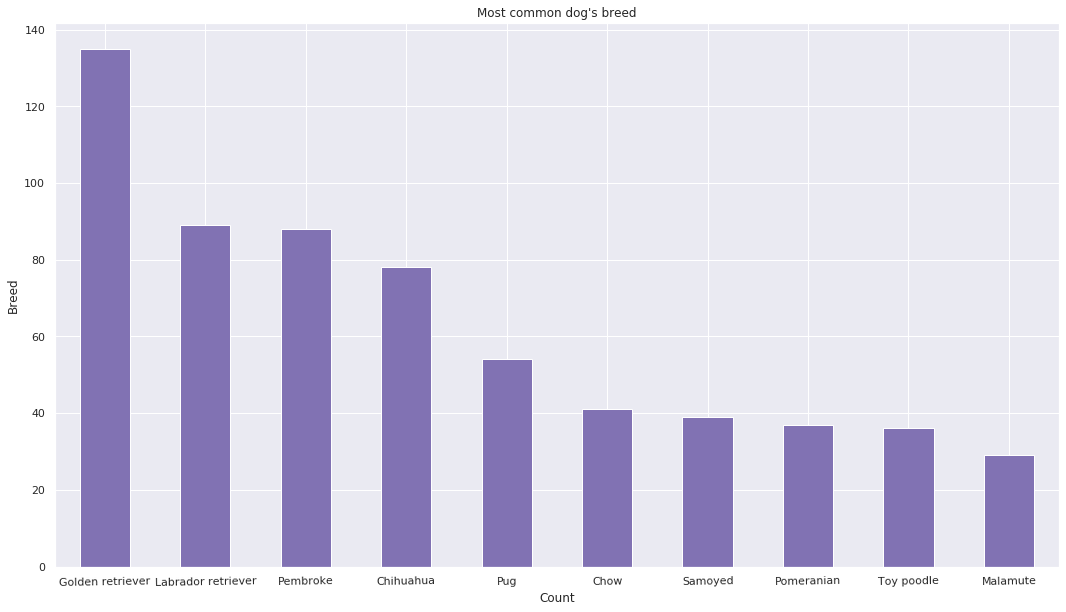

In [484]:
base_color = sns.color_palette()[4]

#df_pred.p1.value_counts().head(10)
ax = data_new.p1.value_counts().head(10).plot.bar(x='lab', y='val', color = base_color, rot=1,figsize=(18,10))
ax.set_ylabel("Breed");
ax.set_xlabel("Count");
ax.set_title("Most common dog's breed");

### Most common dog's name?
Although we don't have enough names in order to make a good analysis, we gonna work with those that we have. A lot of entries had faulty names so we had to drop them.

In [485]:
data_new.name.value_counts().head(30)

None       609
Charlie     10
Cooper      10
Oliver      10
Tucker       9
Lucy         9
Penny        9
Winston      8
Sadie        8
Toby         7
Daisy        7
Lola         7
Stanley      6
Koda         6
Bo           6
Bella        6
Jax          6
Leo          5
Scout        5
Rusty        5
Louis        5
Milo         5
Buddy        5
Dave         5
Chester      5
Oscar        5
Bailey       5
Winnie       4
Bear         4
Cassie       4
Name: name, dtype: int64

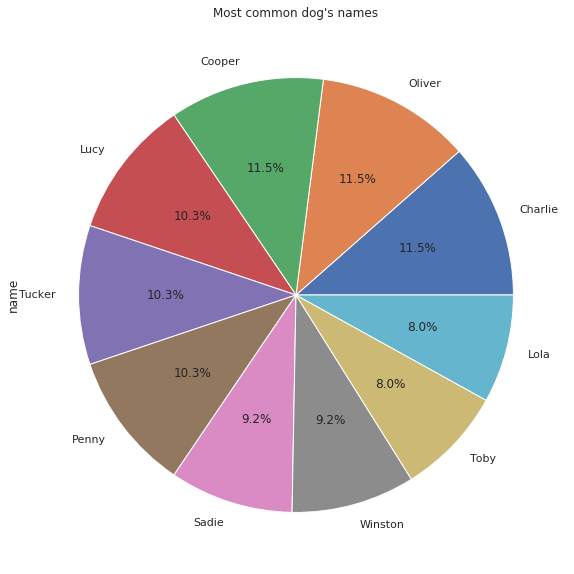

In [492]:
#Visualize the top 10 names.
p = name.value_counts().head(10).plot.pie(x='lab', y='val', autopct='%1.1f%%', rot=2,figsize=(15,10));
p.set_title("Most common dog's names");

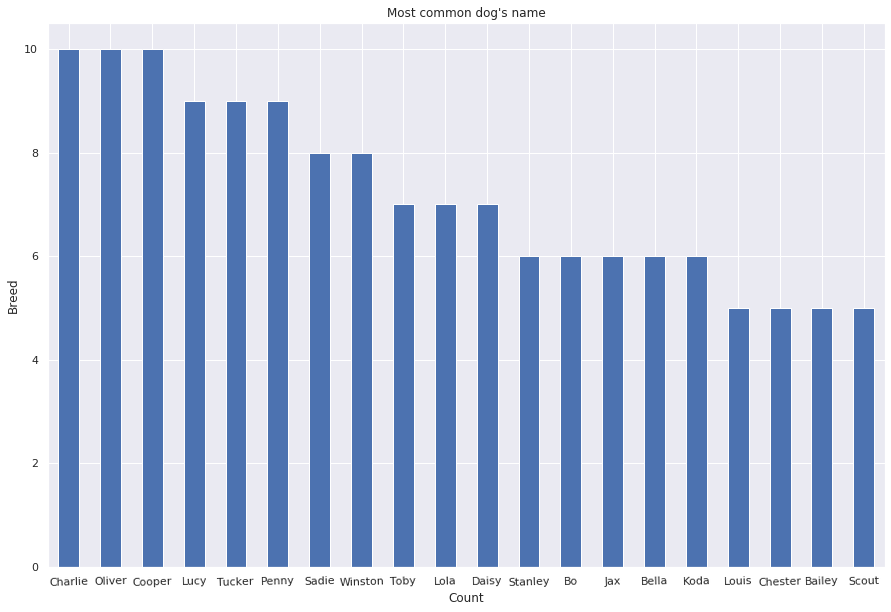

In [493]:
ax = name.value_counts().head(20).plot.bar(x='Count', y='Breed', rot=2,figsize=(15,10))
ax.set_ylabel("Breed");
ax.set_xlabel("Count");
ax.set_title("Most common dog's name");

## Most famous retweet?

In [520]:
from IPython.core.display import display, HTML
top_retweeted = data_new.loc[data_new['retweet_count'] == data_new['retweet_count'].max()]
for tweet in top_retweeted['tweet_id']:
    display(HTML("<a href='https://twitter.com/dog_rates/status/"+str(tweet)+"/' target='blank'>This is the most famous tweet</a>"))
for tweet in top_retweeted['jpg_url']:    
    display(HTML("<a href='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' target='blank'>You can see the picture here!</a>"))

In [515]:
top_retweeted

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
757,744234799360020481,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10.0,None,doggo,78066,156660,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True,06-18-2016,18:26


## Favorite count vs retweet count.

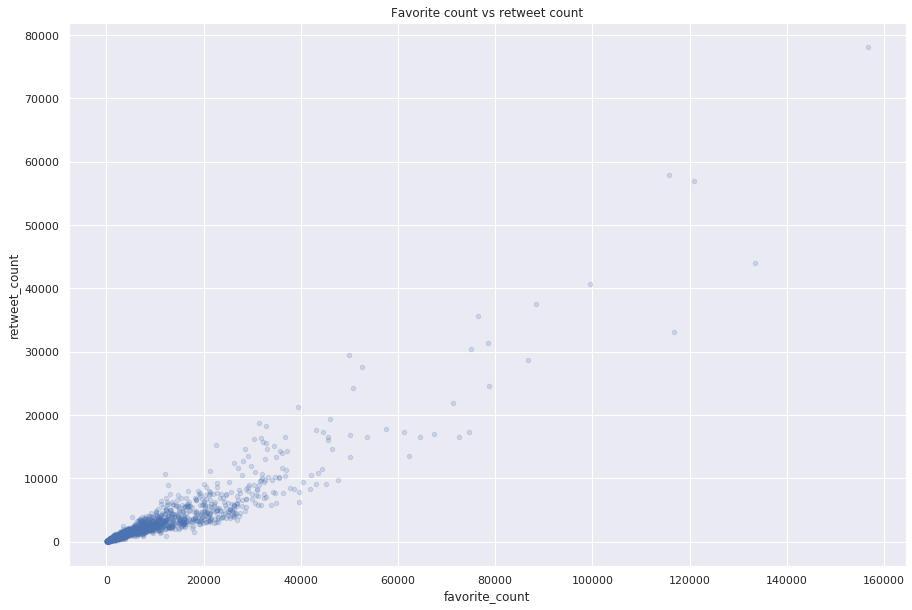

In [496]:
data_new.plot(kind='scatter', x='favorite_count', y='retweet_count', alpha= 0.2, c = 'b', figsize=(15,10));
plt.title('Favorite count vs retweet count');

In [497]:
#See the correlation between favorite count and retweet count.
data_new['favorite_count'].corr(data_new['retweet_count'])

0.9290140294259182

## Most common twitter device?
As we can see twitter for iPhone is very popular.

In [498]:
data_new.source.value_counts()

Twitter for iPhone    1910
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64

Twitter for iPhone    1910
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64


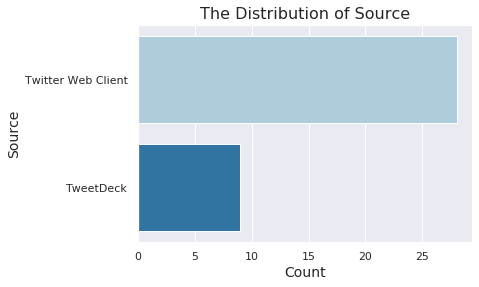

In [501]:
plot = data_new['source'].value_counts().tail(2).index
print(data_new['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = data_new, y = 'source', palette="Paired", order = plot)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

### Most popular dog type?
As we saw during the analysis, there we lot of names for dogs. Pupper,doggo,puppo,floofer were found for describing the dogs. It is interesting to visualize the result and see the most used one.

In [504]:
data_new.dog_type.value_counts()

None      1594
pupper     225
doggo       67
floof       33
puppo       28
Name: dog_type, dtype: int64

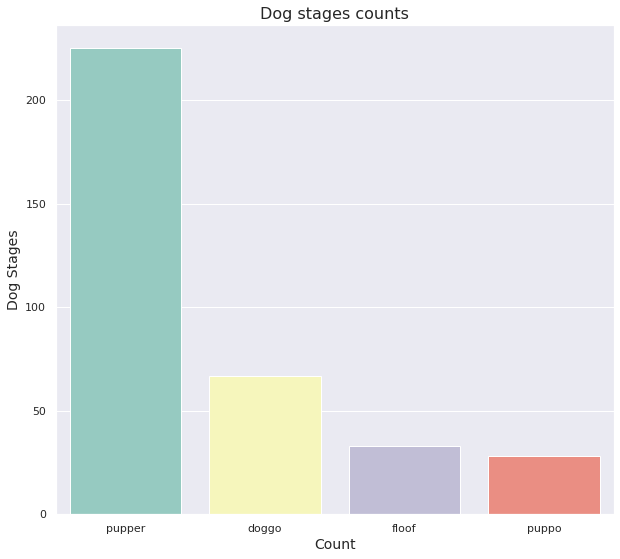

In [508]:
plt.figure(figsize=(10,9))

dog_stages_plot = data_new['dog_type'].value_counts().tail(4).index
sns.set(style="darkgrid")
sns.countplot(data = data_new, x = 'dog_type', order = dog_stages_plot, palette="Set3", orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('Dog stages counts',fontsize=16);

### What is the most common rating?

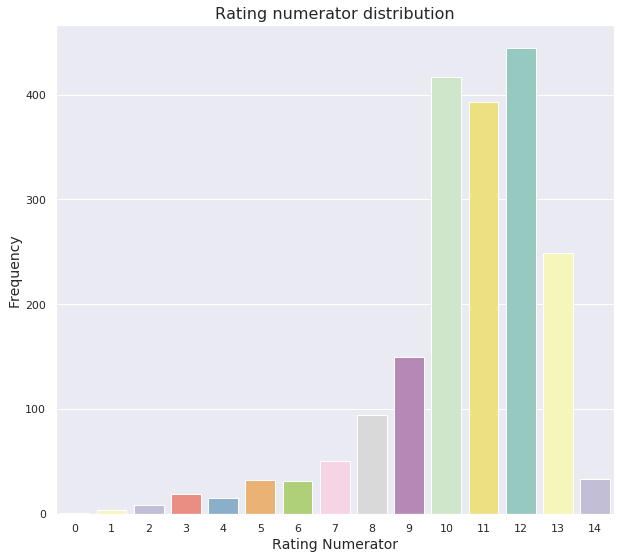

In [544]:
plt.figure(figsize=(10,9))

rating_numerator_plot = data_new['rating_numerator'].value_counts().tail(10).index
sns.set(style="darkgrid")
sns.countplot(data = data_new, x = 'rating_numerator', palette="Set3", orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Rating Numerator', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Rating numerator distribution',fontsize=16);